In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Часть I: О теореме Байеса

## 1. Выступление прокурора

<p style="border-radius: 4px; padding: 16px; margin: 4px; box-shadow: 0 0 4px rgba(0,0,0,0.25);">
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
</p>

Введем обозначения:

* $A$ - Событие, обозначающее, что подсудимый имеет редкую группу крови. 
* $B$ - Событие, обозначающее, что подсудимый является убийцей.

К этому моменты нам известны следующие вероятности:

* $\mathsf{P}(A) = 0.01$
* $\mathsf{P}(A \mid B) = 1$


По теореме Баейса, условная вероятность $\mathsf{P}(B \mid A)$ того, что подсудимый является убийцей, равна

$$\mathsf{P}(B \mid A) = \frac{ \mathsf{P}(B) \mathsf{P}(A \mid B) }{ \mathsf{P}(A) } = 100 * \mathsf{P}(B)$$

<p style="border-radius: 4px; padding: 16px; margin: 4px; box-shadow: 0 0 4px rgba(0,0,0,0.25);">
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен - всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.
</p>

Прокурор оценивает вероятность $\mathsf{P}(A \mid \neg B)$ редкой группы крови у подсудимого, при условии, что тот невиновен:

$$ \mathsf{P}(A \mid \neg B) = \frac{ \mathsf{P}(A) \mathsf{P}(\neg B \mid A) }{ \mathsf{P}(\neg B) } = \frac{ 0.01 *  \mathsf{P}(\neg B \mid A) }{ \mathsf{P}(\neg B) } = 0.01$$

Здесь прокурор делает неявное допущение, что вероятность $\mathsf{P}(\neg B)$ того, что подсудимый не является убийцей равна вероятности $\mathsf{P}(\neg B \mid A)$ того, что подсудимый не является убийцей с условием редкой группы крови. Очевидно, что это в общем случае неверно.

Далее прокурор пытается ввести судью в заблуждение, используя выдуманное равенство и получает итоговый результат в 99%:

$$ \mathsf{P}(B \mid A) = 1 - \mathsf{P}(A \mid \neg B) = 0.99$$

## 2. Выступление адвоката

<p style="border-radius: 4px; padding: 16px; margin: 4px; box-shadow: 0 0 4px rgba(0,0,0,0.25);">Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь - это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?</p>

Из слов адвоката мы узнаем, что в городе живет $10^6$ человек, следовательно

$$ \mathsf{P}(B) = 10^{-6} $$

По словам адвоката, вероятность $\mathsf{P}(B \mid A)$ того, что подсудимый является убийцей при условии, что он имеет редкую группу крови, равна

$$\mathsf{P}(B \mid A) = \frac{ \mathsf{P}(B) \mathsf{P}(A \mid B) }{ \mathsf{P}(A) } = \frac{10^{-6} * 1}{10^{-2}} = 10^{-4}$$

<strong>Адвокат прав</strong>. Все 10 тысяч жителей города, обладающих редкой группой крови, с равной вероятностью являются убийцами. Поэтому имеющихся доказательств недостаточно, чтобы осудить конкретно одного подсудимого. Прокурору следует озадачиться поиском более надежных улик.

## 3. Тест на страшную болезнь

Вспомним страшную болезнь из первой лекции:

* $A$ - событие, обозначающее, что человек болен
* $B$ - событие, обозначающее, что человек здоров; $B = \neg A$
* $T$ - событие, обозначающее, что тест показывает положительный результат
* $F$ - событие, обозначающее, что тест показывает отрицательный результат
* $\mathsf{P}(A) = 0.01$
* $\mathsf{P}(B) = \mathsf{P}(\neg A) = 0.99$
* $\mathsf{P}(T \mid A) = 0.95$
* $\mathsf{P}(F \mid A) = 0.05$
* $\mathsf{P}(T \mid B) = 0.05$
* $\mathsf{P}(F \mid B) = 0.95$

Отсюда следует, что:

$$ \mathsf{P}(A \mid T) = \frac{ \mathsf{P}(A) \mathsf{P}(T \mid A)}{\mathsf{P}(T)} = \frac{ \mathsf{P}(A) \mathsf{P}(T \mid A)}{\mathsf{P}(T \mid A) \mathsf{P}(A) + \mathsf{P}(T \mid B) \mathsf{P}(B)} = \frac{0.01 * 0.95}{0.95 * 0.01 + 0.05 * 0.99} \approx 0.16$$

### Зависимость апостериорной вероятности $\mathsf{P}(A \mid T)$ от ошибки $\mathsf{P}(F \mid A)$:

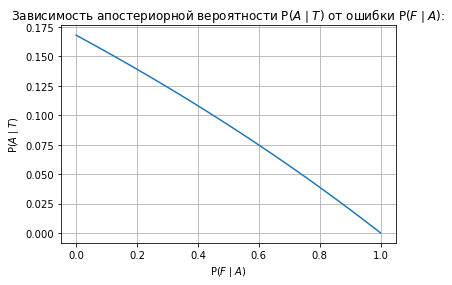

In [2]:
x = np.linspace(0, 1., 100)

def f(x):
    return 0.01 * (1. - x) / ((1. - x) * 0.01 + 0.05 * 0.99)

plt.title("Зависимость апостериорной вероятности $\mathsf{P}(A \mid T)$ от ошибки $\mathsf{P}(F \mid A)$:") # заголовок
plt.xlabel("$\mathsf{P}(F \mid A)$")
plt.ylabel("$\mathsf{P}(A \mid T)$")
plt.grid()
plt.plot(x, f(x))

### Зависимость апостериорной вероятности $\mathsf{P}(A \mid T)$ от ошибки $\mathsf{P}(T \mid B)$:

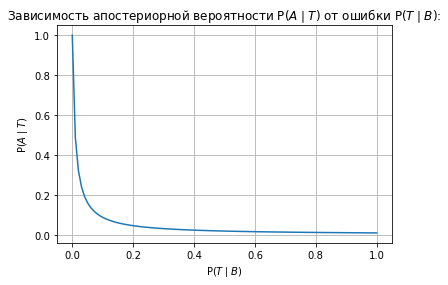

In [3]:
x = np.linspace(0, 1., 100)

def f(x):
    return 0.01 * 0.95 / (0.95 * 0.01 + x * 0.99)

plt.title("Зависимость апостериорной вероятности $\mathsf{P}(A \mid T)$ от ошибки $\mathsf{P}(T \mid B)$:") # заголовок
plt.xlabel("$\mathsf{P}(T \mid B)$")
plt.ylabel("$\mathsf{P}(A \mid T)$")
plt.grid()
plt.plot(x, f(x))

### Вывод

Для того, чтобы увеличить апостериорную вероятность $\mathsf{P}(A \mid T)$ того, что человек действительно болен при условии положительного теста, врачам стоит уменьшать ошибку <i>false positives</i>. При уменьшении ошибки $\mathsf{P}(T \mid B) = \mathsf{P}(T \mid \neg A)$ до нуля, апостериорная вероятность $\mathsf{P}(A \mid T)$ станет равна единице.

Если врачи сосредоточатся на другом типе ошибок - <i>false negatives</i>, то они добьются лишь небольшого повышения апостериорной вероятности $\mathsf{P}(A \mid T)$.

# Часть II: О линейной регрессии

## 1. Загрузка данных

Будем считать, что данные уже загружены

In [4]:
df_covid = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [5]:
df_covid_rus = df_covid[(df_covid['iso_code'] == 'RUS') & (df_covid['date'] >= pd.to_datetime('2020-03-02'))]

## 2. Графики целевых переменных и линейная модель

Построим графики целевых переменных: total_cases и new_cases

In [6]:
def plot_target_curves(df):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(16, 8)
    axs[0].plot(df['date'], df['total_cases'])
    axs[0].set_title('Total cases')
    axs[0].xaxis.set_tick_params(rotation=45)
    axs[1].plot(df['date'], df['new_cases'])
    axs[1].set_title('New cases')
    axs[1].xaxis.set_tick_params(rotation=45)

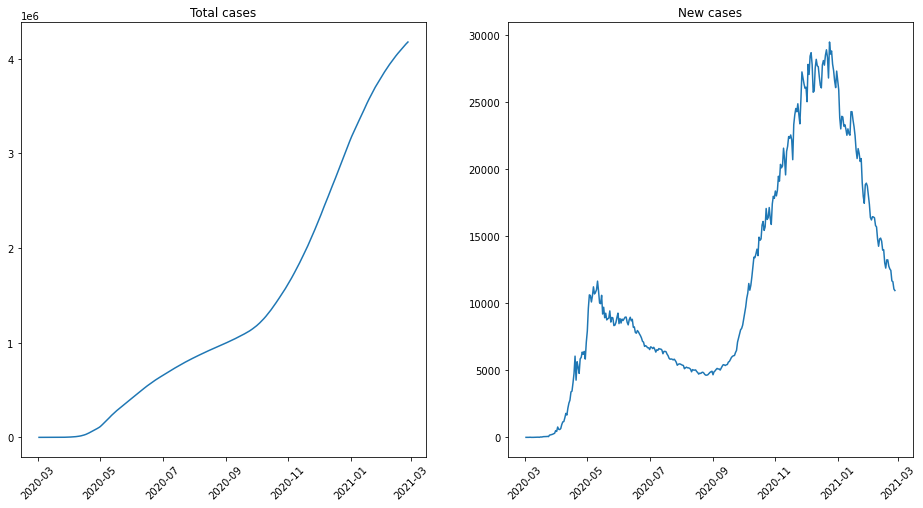

In [7]:
plot_target_curves(df_covid_rus)

In [8]:
df_train = df_covid_rus[df_covid_rus['date'] < (pd.to_datetime('2020-03-02') + pd.Timedelta('50 days'))]

In [9]:
df_test = df_covid_rus[df_covid_rus['date'] >= (pd.to_datetime('2020-03-02') + pd.Timedelta('50 days'))]

### a. Построим линейную регрессию

Пусть $\mathbf{X} = \{\mathbf{x_1}, ... , \mathbf{x_N}\}$ - набор данных, а $\mathbf{y} = \{y_1, ... , y_N\}$ - целевая переменная.

Будем считать что дано априорное распределение:

$$ p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \mid \mu_0, \Sigma_0) $$

Будем предполагать, что данные независимы и одинаково распределены:

$$ p(\mathbf{y} \mid \mathbf{X}, \mathbf{w}, \sigma^2) = \prod_{n = 1}^{N} \mathcal{N}(y_n \mid \mathbf{w}^T \mathbf{x}_n, \sigma^2) $$ 

Тогда наша задача посчитать

$$ p(\mathbf{w} \mid \mathbf{y}) \propto p(\mathbf{y} \mid \mathbf{X}, \mathbf{w}, \sigma^2)p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \mid \mu_0, \Sigma_0) \prod_{n=1}^{N} \mathcal{N}(y_n \mid \mathbf{w}^T \mathbf{x}_n, \sigma^2)$$

Получится следующее:

$$ p(\mathbf{w} \mid \mathbf{y}) = \mathcal{N}(\mathbf{w} \mid \mu_N, \Sigma_N) $$

где

$$ \mu_N = \Sigma_N (\Sigma_0^{-1} \mu_0 + \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{y}) $$
$$ \Sigma_N = (\Sigma_0^{-1} + \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X})^{-1} $$

In [10]:
class BayesianLinearRegression:
    
    def __init__(self, mu_0, Sigma_0):
        self.mu_0 = mu_0
        self.Sigma_0 = Sigma_0
    
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
        variance = (y - X.dot(W)).var()
        
        self.Sigma_N = np.linalg.inv(np.linalg.inv(self.Sigma_0) + (1 / variance) * X.T.dot(X))
        self.mu_N = self.Sigma_N.dot(np.linalg.inv(self.Sigma_0).dot(self.mu_0) + (1 / variance) * X.T.dot(y))
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.mu_N)


In [11]:
X_train = np.arange(1, df_train.shape[0] + 1).reshape(-1, 1)
X_test = np.arange(df_train.shape[0] + 1, df_train.shape[0] + df_test.shape[0] + 1).reshape(-1, 1)
y1_train = df_train['total_cases'].to_numpy()
y1_train[y1_train <= 0] = 1
y1_test = df_test['total_cases'].to_numpy()
y1_test[y1_test <= 0] = 1
y2_train = df_train['new_cases'].to_numpy()
y2_train[y2_train <= 0] = 1
y2_test = df_test['new_cases'].to_numpy()
y2_test[y2_test <= 0] = 1

Строим линейную регрессию. Пусть $ \mu_0 = [0, 0] $ и $\Sigma_0 = diag(1)$

In [12]:
mu_0 = np.array([0, 0])
Sigma_0 = np.eye(2)

linreg_total_cases = BayesianLinearRegression(mu_0, Sigma_0)
linreg_new_cases = BayesianLinearRegression(mu_0, Sigma_0)

In [13]:
linreg_total_cases.fit(X_train, np.log(y1_train))
linreg_new_cases.fit(X_train, np.log(y2_train))

Предскажем значения для первых 65 дней и построим графики предсказанных значений заболеваемости:

In [14]:
days_count = 65
X_full = np.arange(1, days_count + 1).reshape(-1, 1) #np.vstack((X_train, X_test))
total_cases_pred = np.exp(linreg_total_cases.predict(X_full))
new_cases_pred = np.exp(linreg_new_cases.predict(X_full))

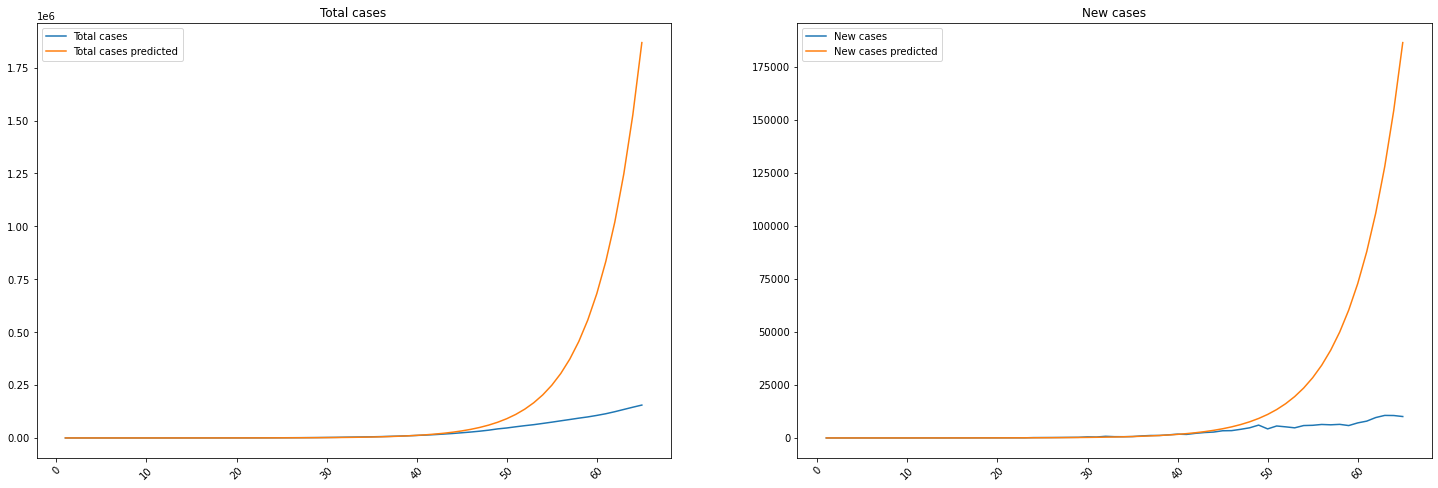

In [15]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(25, 8)
axs[0].plot(X_full, df_covid_rus['total_cases'].to_numpy()[:X_full.shape[0]], label='Total cases')
axs[0].plot(X_full, total_cases_pred, label='Total cases predicted')
axs[0].set_title('Total cases')
axs[0].xaxis.set_tick_params(rotation=45)
axs[1].plot(X_full, df_covid_rus['new_cases'].to_numpy()[:X_full.shape[0]], label='New cases')
axs[1].plot(X_full, new_cases_pred, label='New cases predicted')
axs[1].set_title('New cases')
axs[1].xaxis.set_tick_params(rotation=45)
axs[0].legend()
axs[1].legend()

Видно, что $\mathbf{y} \sim exp(\mathbf{w}^T \mathbf{x})$ действительно очень плохо моделирует ситуацию

### b. Найдем апостериорное распределение параметров

In [16]:
print(linreg_total_cases.mu_N)
print(linreg_total_cases.Sigma_N)

[1.34122754 0.20152959]
[[ 9.53874369e-03 -2.83328250e-04]
 [-2.83328250e-04  1.11368686e-05]]


In [17]:
print(linreg_new_cases.mu_N)
print(linreg_new_cases.Sigma_N)

[-0.09298094  0.18814274]
[[ 2.74075090e-02 -8.14077944e-04]
 [-8.14077944e-04  3.21428580e-05]]


In [18]:
def plot_distribution(axs, data, x_space, y_space):
    x, y = np.meshgrid(x_space, y_space)

    points = np.c_[x[..., None], y[..., None]]

    axs.pcolormesh(x, y, data.pdf(points), cmap=plt.cm.inferno)

<ipython-input-18-836f2f540e7f>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs.pcolormesh(x, y, data.pdf(points), cmap=plt.cm.inferno)


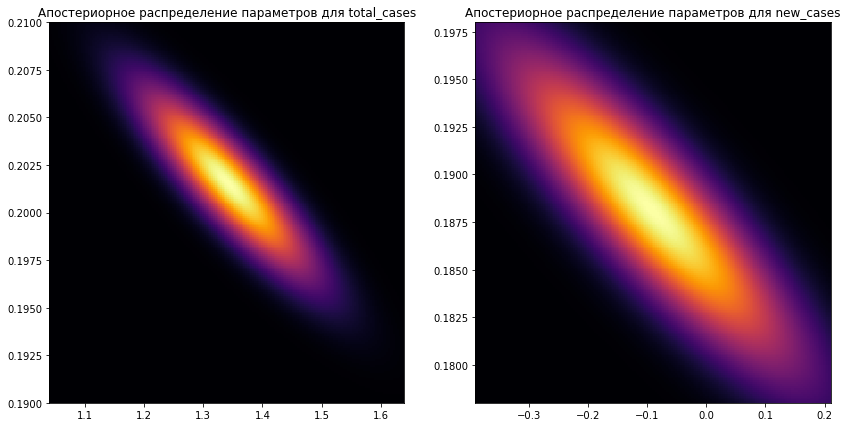

In [19]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

data_total_cases = sps.multivariate_normal(linreg_total_cases.mu_N, linreg_total_cases.Sigma_N)
data_new_cases = sps.multivariate_normal(linreg_new_cases.mu_N, linreg_new_cases.Sigma_N)

plot_distribution(axs[0], data_total_cases, np.linspace(1.34 - 0.3, 1.34 + 0.3, 200), np.linspace(0.2 - 0.01, 0.2 + 0.01, 200))
plot_distribution(axs[1], data_new_cases, np.linspace(-0.09 - 0.3, -0.09 + 0.3, 200), np.linspace(0.188 - 0.01, 0.188 + 0.01, 200))
axs[0].set_title('Апостериорное распределение параметров для total_cases');
axs[1].set_title('Апостериорное распределение параметров для new_cases');

### c. Посемплируем много разных экспонент

In [20]:
def generate_y_samples(model, X, n):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    W_samples = np.random.multivariate_normal(model.mu_N, model.Sigma_N, n)
    y_samples = []
    for W in W_samples:
        y_samples.append(X.dot(W))
    
    y_samples = np.array(y_samples)
    return y_samples

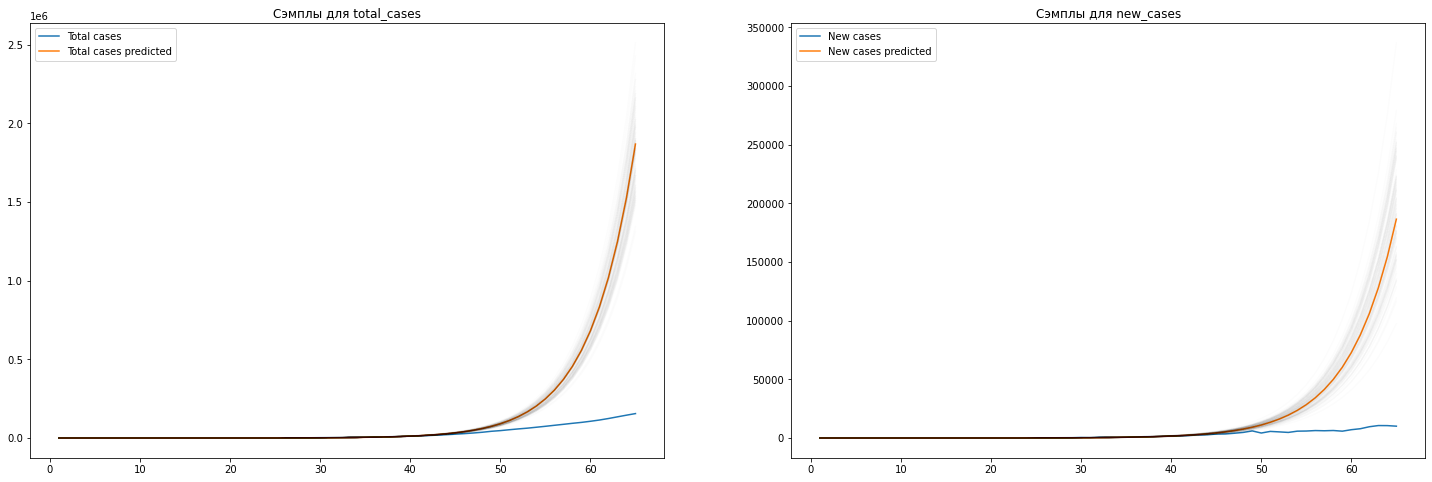

In [21]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(25, 8)

axs[0].plot(X_full, df_covid_rus['total_cases'].to_numpy()[:X_full.shape[0]], label='Total cases')
axs[0].plot(X_full, total_cases_pred, label='Total cases predicted')
y_samples_total_cases = np.exp(generate_y_samples(linreg_total_cases, X_full, 100))
for sample in y_samples_total_cases:
    axs[0].plot(X_full, sample, color="black", alpha=0.01)

axs[0].set_title("Сэмплы для total_cases")
axs[0].legend()

axs[1].plot(X_full, df_covid_rus['new_cases'].to_numpy()[:X_full.shape[0]], label='New cases')
axs[1].plot(X_full, new_cases_pred, label='New cases predicted')
y_samples_new_cases = np.exp(generate_y_samples(linreg_new_cases, X_full, 100))
for sample in y_samples_new_cases:
    axs[1].plot(X_full, sample, color="black", alpha=0.01)

axs[1].set_title("Сэмплы для new_cases")
axs[1].legend()

А теперь предскажем значения моделей на несколько дат:

In [22]:
print(f"К 1 мая всего будет {int(np.exp(linreg_total_cases.predict(np.array([[(pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-02')).days]]))))} заболевших")
print(f"К 1 июня всего будет {int(np.exp(linreg_total_cases.predict(np.array([[(pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-02')).days]]))))} заболевших")
print(f"К 1 сентября всего будет {int(np.exp(linreg_total_cases.predict(np.array([[(pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-02')).days]]))))} заболевших")
print()
print(f"1 мая будет {int(np.exp(linreg_new_cases.predict(np.array([[(pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-02')).days]]))))} новых случаев")
print(f"1 июня будет {int(np.exp(linreg_new_cases.predict(np.array([[(pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-02')).days]]))))} новых случаев")
print(f"1 сентября будет {int(np.exp(linreg_new_cases.predict(np.array([[(pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-02')).days]]))))} новых случаев")

К 1 мая всего будет 682148 заболевших
К 1 июня всего будет 352450362 заболевших
К 1 сентября всего будет 39740323025431256 заболевших

1 мая будет 72808 новых случаев
1 июня будет 24841063 новых случаев
1 сентября будет 817392860604733 новых случаев


Построим предсказательные распределения:

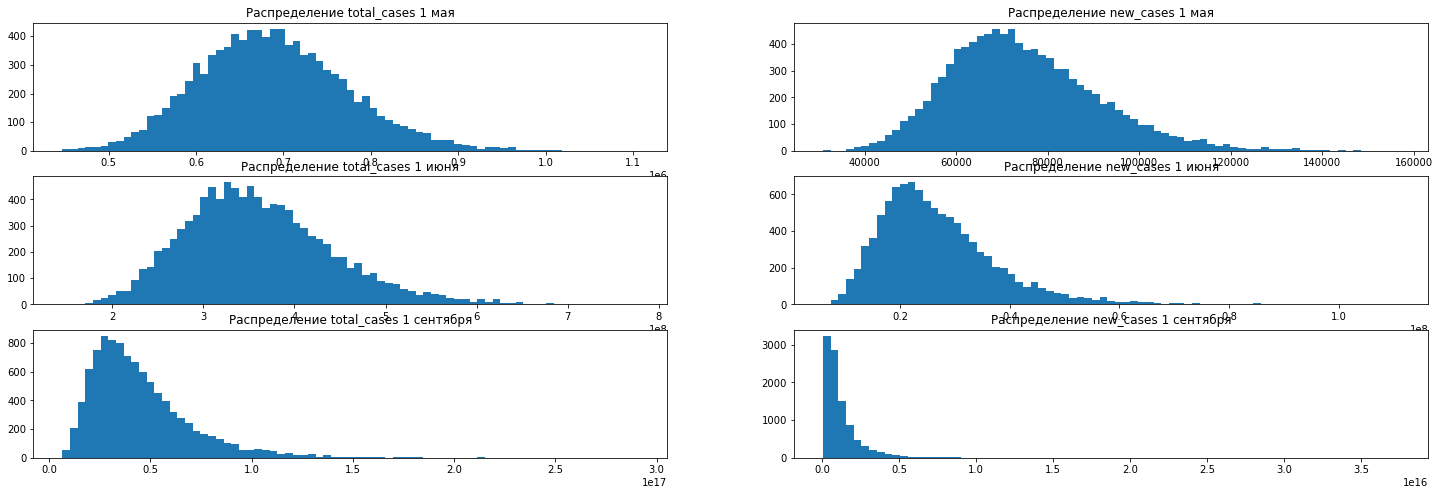

In [23]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(25, 8)

total_cases_may_predicted = np.exp(generate_y_samples(linreg_total_cases, np.array([[(pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-02')).days]]), 10000)).flatten()
total_cases_june_predicted = np.exp(generate_y_samples(linreg_total_cases, np.array([[(pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-02')).days]]), 10000)).flatten()
total_cases_sep_predicted = np.exp(generate_y_samples(linreg_total_cases, np.array([[(pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-02')).days]]), 10000)).flatten()
new_cases_may_predicted = np.exp(generate_y_samples(linreg_new_cases, np.array([[(pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-02')).days]]), 10000)).flatten()
new_cases_june_predicted = np.exp(generate_y_samples(linreg_new_cases, np.array([[(pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-02')).days]]), 10000)).flatten()
new_cases_sep_predicted = np.exp(generate_y_samples(linreg_new_cases, np.array([[(pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-02')).days]]), 10000)).flatten()


axs[0, 0].hist(total_cases_may_predicted, bins=75)
axs[1, 0].hist(total_cases_june_predicted, bins=75)
axs[2, 0].hist(total_cases_sep_predicted, bins=75)
axs[0, 1].hist(new_cases_may_predicted, bins=75)
axs[1, 1].hist(new_cases_june_predicted, bins=75)
axs[2, 1].hist(new_cases_sep_predicted, bins=75)

axs[0, 0].set_title('Распределение total_cases 1 мая');
axs[1, 0].set_title('Распределение total_cases 1 июня');
axs[2, 0].set_title('Распределение total_cases 1 сентября');
axs[0, 1].set_title('Распределение new_cases 1 мая');
axs[1, 1].set_title('Распределение new_cases 1 июня');
axs[2, 1].set_title('Распределение new_cases 1 сентября');